# 5.이미지 분류
## 5.1 개/고양이 예를 반려동물 품종으로 확장하기

In [2]:
# load dataset
from fastai.vision.all import *
path = untar_data(URLs.PETS)

path.ls()

(#2) [Path('/home/shyeon/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/shyeon/.fastai/data/oxford-iiit-pet/images')]

In [3]:
(path/"images").ls()

(#7393) [Path('/home/shyeon/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_78.jpg'),Path('/home/shyeon/.fastai/data/oxford-iiit-pet/images/leonberger_137.jpg'),Path('/home/shyeon/.fastai/data/oxford-iiit-pet/images/leonberger_92.jpg'),Path('/home/shyeon/.fastai/data/oxford-iiit-pet/images/samoyed_48.jpg'),Path('/home/shyeon/.fastai/data/oxford-iiit-pet/images/newfoundland_48.jpg'),Path('/home/shyeon/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_32.jpg'),Path('/home/shyeon/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_15.jpg'),Path('/home/shyeon/.fastai/data/oxford-iiit-pet/images/Russian_Blue_142.jpg'),Path('/home/shyeon/.fastai/data/oxford-iiit-pet/images/american_bulldog_67.jpg'),Path('/home/shyeon/.fastai/data/oxford-iiit-pet/images/havanese_35.jpg')...]

In [4]:
# test one file
fname = (path/"images").ls()[0]
re.findall(r"(.+)_\d+.jpg$", fname.name)  # 하나 이상의 숫자와 확장자 이전의 모든 문자 

['american_pit_bull_terrier']

In [5]:
# DataBlock
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r"(.+)_\d+.jpg$"), "name"),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

In [6]:
# item_tfms=Resize(460)  # 전체 너비나 높이를 기준으로 잘라내는 단계
# batch_tfms=aug_transforms(size=224, min_scale=0.75)  # 임의의 부분을 잘라낸 후 증강하는 단계

## 5.2 사전 크기 조절

- 이미지 증강 결과 확인 후 기본 모델로 빠르게 테스트를 권장함

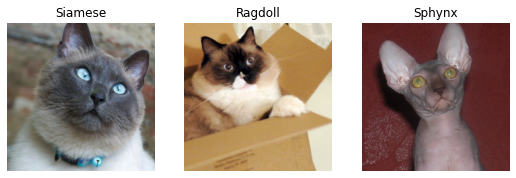

In [7]:
dls.show_batch(nrows=1, ncols=3)

In [9]:
# 이미지 크기를 조절하는 부분이 빠진 경우 등 summary를 통해서 확인 가능
pets_error = DataBlock(blocks=(ImageBlock, CategoryBlock),
                       get_items=get_image_files,
                       splitter=RandomSplitter(seed=42),
                       get_y=using_attr(RegexLabeller(r"(.+)_\d+.jpg$"), "name"))

pets_error.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/shyeon/.fastai/data/oxford-iiit-pet/images/american_bulldog_93.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=335x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /home/shyeon/.fastai/data/oxford-iiit-pet/images/american_bulldog_93.jpg
    applying partial gives
      american_bulldog
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(12)

Final sample: (PILImage mode=RGB size=335x500, TensorCategory(12))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_n

RuntimeError: stack expects each tensor to be equal size, but got [3, 500, 335] at entry 0 and [3, 500, 336] at entry 1

In [12]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time


ERROR: Unexpected bus error encountered in worker. This might be caused by insufficient shared memory (shm).
 ERROR: Unexpected bus error encountered in worker. This might be caused by insufficient shared memory (shm).
 ERROR: Unexpected bus error encountered in worker. This might be caused by insufficient shared memory (shm).
 ERROR: Unexpected bus error encountered in worker. This might be caused by insufficient shared memory (shm).
 ERROR: Unexpected bus error encountered in worker. This might be caused by insufficient shared memory (shm).
 ERROR: Unexpected bus error encountered in worker. This might be caused by insufficient shared memory (shm).
 ERROR: Unexpected bus error encountered in worker. This might be caused by insufficient shared memory (shm).
 

RuntimeError: DataLoader worker (pid(s) 180) exited unexpectedly